In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

## 1. Load the dataset

In [2]:
def load_data():
    dataset = load_diabetes()
    X, y = pd.DataFrame(dataset.data), pd.Series(dataset.target)
    X.columns = dataset.feature_names
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    return X_train, X_test, y_train, y_test

In [3]:
X_train, X_test, y_train, y_test = load_data()
X_train.shape

(331, 10)

In [4]:
X_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,-0.000521,-0.000581,-0.002211,-0.000952,-0.000484,-0.001344,0.001963,-0.001662,-0.000313,0.000462
std,0.048636,0.047597,0.047663,0.048673,0.047778,0.048183,0.049423,0.048321,0.047942,0.047671
min,-0.107226,-0.044642,-0.090275,-0.108957,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.129483
25%,-0.036391,-0.044642,-0.036385,-0.036656,-0.034592,-0.033881,-0.034197,-0.039493,-0.035170,-0.034215
50%,0.005383,-0.044642,-0.008362,-0.005671,-0.004321,-0.004132,-0.006584,-0.002592,-0.003304,0.003064
75%,0.038076,0.050680,0.028284,0.035070,0.030078,0.026869,0.032073,0.034309,0.032433,0.027917
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133599,0.135612


In [5]:
y_train.head()

331    199.0
412    261.0
201     39.0
159    195.0
227    108.0
dtype: float64

## 2. The definition of the loss function

In [16]:
def loss(rx, ry, w):
    m = len(rx)
    sse = 0.
    for j in range(m):
        y = w[0] + w[1] * rx[j]
        sse += (ry[j] - y) ** 2
    return sse

## 3. Plot the 2D space

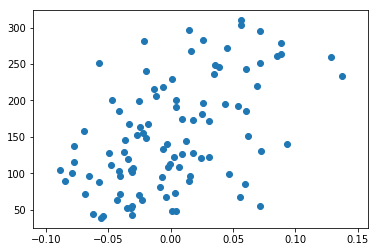

In [7]:
plt.scatter(X_train['bmi'][:100], y_train[:100])

## 4. Find the best w1

In [10]:
rx = np.array(X_train['bmi'])
ry = np.array(y_train)

In [48]:
w1 = np.linspace(0, 1000, 1000)

In [52]:
errors = []
for i in range(len(w1)):
    errors.append(loss(rx, ry, [1, w1[i]]))

In [53]:
errors

[9286542.0,
 9285309.704747096,
 9284078.915091172,
 9282849.631032208,
 9281621.852570217,
 9280395.579705196,
 9279170.812437126,
 9277947.550766034,
 9276725.79469192,
 9275505.544214766,
 9274286.799334582,
 9273069.560051378,
 9271853.826365119,
 9270639.598275837,
 9269426.875783522,
 9268215.658888187,
 9267005.947589807,
 9265797.741888398,
 9264591.041783953,
 9263385.84727649,
 9262182.15836598,
 9260979.975052442,
 9259779.297335878,
 9258580.125216285,
 9257382.458693651,
 9256186.297767991,
 9254991.642439302,
 9253798.492707575,
 9252606.848572815,
 9251416.710035028,
 9250228.077094208,
 9249040.949750356,
 9247855.328003475,
 9246671.211853549,
 9245488.6013006,
 9244307.496344622,
 9243127.896985618,
 9241949.803223569,
 9240773.215058498,
 9239598.132490389,
 9238424.555519253,
 9237252.484145073,
 9236081.918367881,
 9234912.858187644,
 9233745.30360438,
 9232579.254618077,
 9231414.711228753,
 9230251.673436392,
 9229090.141240994,
 9227930.114642568,
 9226771.59364

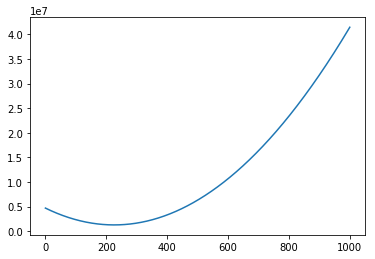

In [70]:
samples = np.linspace(0,1000, 1000)
plt.plot(samples, errors)

In [47]:
w1_index = np.argmin(errors)
k = w1[w1_index]
print(w1_index, k)

819 819.8198198198199


## 5. Find the best w0

In [60]:
w0 = np.linspace(50, 500, 1000)
errors = []
for i in range(len(w0)):
    errors.append(loss(rx, ry, [w0[i], k]))

In [61]:
errors

[4689500.387249202,
 4659255.063965445,
 4629144.064194394,
 4599167.387936047,
 4569325.035190396,
 4539617.005957453,
 4510043.300237204,
 4480603.91802966,
 4451298.859334821,
 4422128.124152678,
 4393091.712483246,
 4364189.624326507,
 4335421.859682475,
 4306788.41855114,
 4278289.300932514,
 4249924.506826584,
 4221694.036233358,
 4193597.889152835,
 4165636.065585012,
 4137808.565529894,
 4110115.388987476,
 4082556.5359577565,
 4055132.0064407443,
 4027841.800436431,
 4000685.917944821,
 3973664.3589659147,
 3946777.123499702,
 3920024.2115462,
 3893405.6231053956,
 3866921.3581772936,
 3840571.4167618966,
 3814355.798859198,
 3788274.504469204,
 3762327.533591909,
 3736514.886227313,
 3710836.562375428,
 3685292.562036242,
 3659882.8852097522,
 3634607.5318959695,
 3609466.502094882,
 3584459.7958065057,
 3559587.413030827,
 3534849.353767846,
 3510245.6180175766,
 3485776.2057799995,
 3461441.117055129,
 3437240.351842963,
 3413173.910143495,
 3389241.7919567307,
 3365443.997

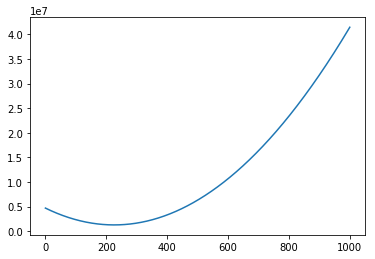

In [62]:
samples = np.linspace(0,1000, 1000)
plt.plot(samples, errors)

In [63]:
w0_index = np.argmin(errors)

In [64]:
b = w0[w0_index]
print(b)

151.8018018018018


In [81]:
rx = np.array(X_test['bmi'])
ry = np.array(y_test)
print(len(rx), len(ry))

111 111


## 6. Loss for the model

In [82]:
prediction_loss = loss(rx, ry, [b, k])

In [83]:
prediction_loss

467197.96346958587

In [84]:
print([b, k])
print(len(rx), len(ry))

[151.8018018018018, 819.8198198198199]
111 111


## 7. Plot the best fitting line

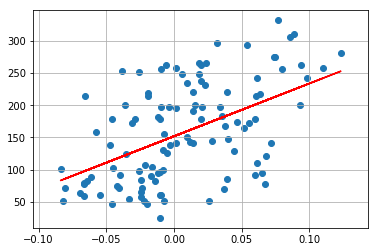

In [87]:
plt.grid()
plt.scatter(rx, ry)
w=[b, k]
y = w[0] + rx * w[1]

plt.plot(rx, y, '-r', label=f'y={w[1]}x+{w[0]}')